In [186]:
import statsmodels.api as sm

import pandas as pd

from patsy import dmatrices

In [187]:
import seaborn as sns

In [188]:
from matplotlib import pyplot as plt

In [189]:
df = pd.read_csv("wifi_localization.txt", delimiter="\t")

In [190]:
df.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [191]:
df = pd.read_csv("fund-raising.csv")

In [192]:
df.head()

,contrib,gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age,gender
0,4.0,12,10,2.0,15,7.0,5.0,4.066667,10,8801,9404,62,F
1,5.0,3,14,3.0,21,6.0,5.0,4.857143,5,9312,9404,66,F
2,13.0,21,5,5.0,12,17.0,10.0,11.000000,0,9001,9503,69,F
3,10.0,6,8,5.0,10,12.0,12.0,9.400000,10,9209,9509,73,M
4,10.0,7,2,10.0,3,15.0,10.0,11.666667,0,9511,9508,58,F


In [193]:
df['contrib'].unique()

array([  4.  ,   5.  ,  13.  ,  10.  ,  20.  ,  16.  ,  26.  ,   7.  ,
         3.  ,  60.  ,  15.  ,  23.  ,   6.  ,  11.  ,  16.87,   2.5 ,
        50.  ,  10.7 ,  35.  ,  14.  ,  21.  ,   2.  ,  12.  ,  25.  ,
        19.  ,  40.  ,  38.  ,  18.  ,  17.  ,  12.5 ,   7.5 ,   1.  ,
         9.  ,  36.  ,   8.  ,  30.  ,  22.  ,  24.  ,  41.  ,  51.  ,
        28.  ,  43.  ,  31.  , 100.  ,  32.  ,  33.  ,  45.  ,  47.  ,
        37.  ,  18.25,  27.  ,  13.92,  46.  , 200.  ,  44.  ,  75.  ,
        53.  ,  29.  ,  17.5 ,  34.  ,   4.5 ,  42.  ,  55.  , 102.  ])

In [194]:
df['gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [195]:
corr = df.corr()

In [196]:
corr

,contrib,gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age
contrib,1.000000,0.112192,-0.214586,0.407175,-0.211630,0.414476,0.746451,0.663092,0.018597,-0.065409,0.131160,-0.025829
gapmos,0.112192,1.000000,-0.122663,0.101264,-0.138969,0.043845,0.109052,0.120501,0.024835,-0.086470,0.011983,-0.032028
promocontr,-0.214586,-0.122663,1.000000,-0.377991,0.897084,-0.043710,-0.194761,-0.289574,0.006408,-0.364224,-0.393935,0.196177
mincontrib,0.407175,0.101264,-0.377991,1.000000,-0.370177,0.237322,0.441218,0.703515,-0.003198,0.278263,0.087067,-0.089005
ncontrib,-0.211630,-0.138969,0.897084,-0.370177,1.000000,0.026248,-0.193359,-0.268200,0.002570,-0.305664,-0.389773,0.199914
maxcontrib,0.414476,0.043845,-0.043710,0.237322,0.026248,1.000000,0.514442,0.535534,0.029185,-0.056513,-0.006831,0.021743
lastcontr,0.746451,0.109052,-0.194761,0.441218,-0.193359,0.514442,1.000000,0.766460,0.044186,-0.103314,0.158253,-0.025513
avecontr,0.663092,0.120501,-0.289574,0.703515,-0.268200,0.535534,0.766460,1.000000,0.029075,0.027796,0.037038,-0.050179
mailord,0.018597,0.024835,0.006408,-0.003198,0.002570,0.029185,0.044186,0.029075,1.000000,0.010814,0.013036,0.108515
mindate,-0.065409,-0.086470,-0.364224,0.278263,-0.305664,-0.056513,-0.103314,0.027796,0.010814,1.000000,0.134658,-0.145311


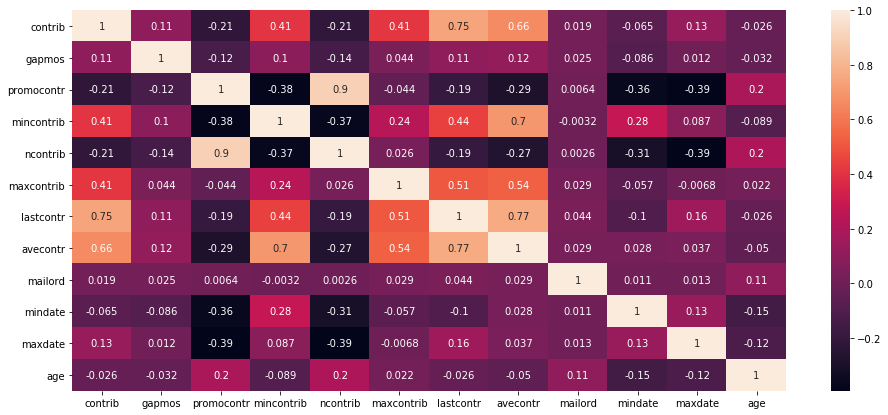

In [197]:
plt.figure(figsize = (16,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [198]:
df.columns

Index(['contrib', 'gapmos', 'promocontr', 'mincontrib', 'ncontrib',
       'maxcontrib', 'lastcontr', 'avecontr', 'mailord', 'mindate', 'maxdate',
       'age', 'gender'],
      dtype='object')

In [199]:
y, X = dmatrices('contrib  ~ gapmos + promocontr + mincontrib + ncontrib + \
                 maxcontrib + lastcontr + avecontr + mailord + mindate + maxdate +age + gender', 
                 data=df, return_type='dataframe')

In [200]:
X.head()

,Intercept,gender[T.M],gender[T.U],gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age
0,1.0,0.0,0.0,12.0,10.0,2.0,15.0,7.0,5.0,4.066667,10.0,8801.0,9404.0,62.0
1,1.0,0.0,0.0,3.0,14.0,3.0,21.0,6.0,5.0,4.857143,5.0,9312.0,9404.0,66.0
2,1.0,0.0,0.0,21.0,5.0,5.0,12.0,17.0,10.0,11.000000,0.0,9001.0,9503.0,69.0
3,1.0,1.0,0.0,6.0,8.0,5.0,10.0,12.0,12.0,9.400000,10.0,9209.0,9509.0,73.0
4,1.0,0.0,0.0,7.0,2.0,10.0,3.0,15.0,10.0,11.666667,0.0,9511.0,9508.0,58.0


In [201]:
y.head()

,contrib
0,4.0
1,5.0
2,13.0
3,10.0
4,10.0


In [202]:
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                contrib   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     368.5
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:58:26   Log-Likelihood:                -11907.
No. Observations:                3470   AIC:                         2.384e+04
Df Residuals:                    3456   BIC:                         2.393e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0676      8.918      0.120      

In [203]:
res.rsquared_adj

0.5793132026110206

In [204]:
mod_equations = []
s = 'contrib ~ '
for c in df.columns[1:]:
    s = s + c + '+'
    print(s[:-1])
    mod_equations.append(s[:-1])

contrib ~ gapmos
contrib ~ gapmos+promocontr
contrib ~ gapmos+promocontr+mincontrib
contrib ~ gapmos+promocontr+mincontrib+ncontrib
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender


In [205]:
mod_equations

['contrib ~ gapmos',
 'contrib ~ gapmos+promocontr',
 'contrib ~ gapmos+promocontr+mincontrib',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age',
 'contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender']

In [206]:
s = 'contrib ~ '
for c in df.columns[1:]:
    s = s + c + '+'
    #print(s[:-1])
    y, X = dmatrices(s[:-1], 
                 data=df, return_type='dataframe')
    mod = sm.OLS(y, X)    # Describe model

    res = mod.fit()       # Fit model

    print(s[:-1], round(res.rsquared_adj,6))


contrib ~ gapmos 0.012302
contrib ~ gapmos+promocontr 0.052988
contrib ~ gapmos+promocontr+mincontrib 0.173676
contrib ~ gapmos+promocontr+mincontrib+ncontrib 0.173595
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib 0.286906
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr 0.568073
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr 0.57884
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord 0.578906
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate 0.579291
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate 0.579489
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age 0.579441
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender 0.579313


In [207]:
for i in range(len(mod_equations)-1, -1, -1):
    s = s + c + '+'
    #print(s[:-1])
    y, X = dmatrices(mod_equations[i], 
                 data=df, return_type='dataframe')
    mod = sm.OLS(y, X)    # Describe model

    res = mod.fit()       # Fit model

    print(mod_equations[i], round(res.rsquared_adj,6))

contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender 0.579313
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age 0.579441
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate 0.579489
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate 0.579291
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord 0.578906
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr 0.57884
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr 0.568073
contrib ~ gapmos+promocontr+mincontrib+ncontrib+maxcontrib 0.286906
contrib ~ gapmos+promocontr+mincontrib+ncontrib 0.173595
contrib ~ gapmos+promocontr+mincontrib 0.173676
contrib ~ gapmos+promocontr 0.052988
contrib ~ gapmos 0.012302


In [208]:
y, X = dmatrices('contrib  ~ gapmos + promocontr + mincontrib + ncontrib + \
                 maxcontrib + lastcontr + avecontr + mailord + mindate + maxdate +age + gender', 
                 data=df, return_type='dataframe')

In [209]:
i = 1
y, X = dmatrices('contrib  ~ gapmos + promocontr + mincontrib + ncontrib + \
                 maxcontrib + lastcontr + avecontr + mailord + mindate + maxdate +age + gender', 
                 data=df, return_type='dataframe')
X_new = X.copy()
for c1 in X.columns[1:]:
    for c2 in X.columns[i+1:]:
        s = c1 + '*' + c2
        print(c1 + '*' + c2)
        X_new[s] = X[c1]*X[c2]
    i = i + 1

gender[T.M]*gender[T.U]
gender[T.M]*gapmos
gender[T.M]*promocontr
gender[T.M]*mincontrib
gender[T.M]*ncontrib
gender[T.M]*maxcontrib
gender[T.M]*lastcontr
gender[T.M]*avecontr
gender[T.M]*mailord
gender[T.M]*mindate
gender[T.M]*maxdate
gender[T.M]*age
gender[T.U]*gapmos
gender[T.U]*promocontr
gender[T.U]*mincontrib
gender[T.U]*ncontrib
gender[T.U]*maxcontrib
gender[T.U]*lastcontr
gender[T.U]*avecontr
gender[T.U]*mailord
gender[T.U]*mindate
gender[T.U]*maxdate
gender[T.U]*age
gapmos*promocontr
gapmos*mincontrib
gapmos*ncontrib
gapmos*maxcontrib
gapmos*lastcontr
gapmos*avecontr
gapmos*mailord
gapmos*mindate
gapmos*maxdate
gapmos*age
promocontr*mincontrib
promocontr*ncontrib
promocontr*maxcontrib
promocontr*lastcontr
promocontr*avecontr
promocontr*mailord
promocontr*mindate
promocontr*maxdate
promocontr*age
mincontrib*ncontrib
mincontrib*maxcontrib
mincontrib*lastcontr
mincontrib*avecontr
mincontrib*mailord
mincontrib*mindate
mincontrib*maxdate
mincontrib*age
ncontrib*maxcontrib
ncontrib*

In [210]:
X_new.head()

,Intercept,gender[T.M],gender[T.U],gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,...,avecontr*mailord,avecontr*mindate,avecontr*maxdate,avecontr*age,mailord*mindate,mailord*maxdate,mailord*age,mindate*maxdate,mindate*age,maxdate*age
0,1.0,0.0,0.0,12.0,10.0,2.0,15.0,7.0,5.0,4.066667,...,40.666667,35790.733336,38242.933336,252.133333,88010.0,94040.0,620.0,82764604.0,545662.0,583048.0
1,1.0,0.0,0.0,3.0,14.0,3.0,21.0,6.0,5.0,4.857143,...,24.285714,45229.714284,45676.571427,320.571429,46560.0,47020.0,330.0,87570048.0,614592.0,620664.0
2,1.0,0.0,0.0,21.0,5.0,5.0,12.0,17.0,10.0,11.000000,...,0.000000,99011.000000,104533.000000,759.000000,0.0,0.0,0.0,85536503.0,621069.0,655707.0
3,1.0,1.0,0.0,6.0,8.0,5.0,10.0,12.0,12.0,9.400000,...,94.000000,86564.600000,89384.600000,686.200000,92090.0,95090.0,730.0,87568381.0,672257.0,694157.0
4,1.0,0.0,0.0,7.0,2.0,10.0,3.0,15.0,10.0,11.666667,...,0.000000,110961.666698,110926.666698,676.666667,0.0,0.0,0.0,90430588.0,551638.0,551464.0


In [211]:
len(X_new.columns)

92

In [212]:
X_new.columns

Index(['Intercept', 'gender[T.M]', 'gender[T.U]', 'gapmos', 'promocontr',
       'mincontrib', 'ncontrib', 'maxcontrib', 'lastcontr', 'avecontr',
       'mailord', 'mindate', 'maxdate', 'age', 'gender[T.M]*gender[T.U]',
       'gender[T.M]*gapmos', 'gender[T.M]*promocontr',
       'gender[T.M]*mincontrib', 'gender[T.M]*ncontrib',
       'gender[T.M]*maxcontrib', 'gender[T.M]*lastcontr',
       'gender[T.M]*avecontr', 'gender[T.M]*mailord', 'gender[T.M]*mindate',
       'gender[T.M]*maxdate', 'gender[T.M]*age', 'gender[T.U]*gapmos',
       'gender[T.U]*promocontr', 'gender[T.U]*mincontrib',
       'gender[T.U]*ncontrib', 'gender[T.U]*maxcontrib',
       'gender[T.U]*lastcontr', 'gender[T.U]*avecontr', 'gender[T.U]*mailord',
       'gender[T.U]*mindate', 'gender[T.U]*maxdate', 'gender[T.U]*age',
       'gapmos*promocontr', 'gapmos*mincontrib', 'gapmos*ncontrib',
       'gapmos*maxcontrib', 'gapmos*lastcontr', 'gapmos*avecontr',
       'gapmos*mailord', 'gapmos*mindate', 'gapmos*maxdate',

In [213]:
s = 'contrib ~ '
df_new = pd.concat([df['contrib'],X_new],axis=1)
df_new.columns = df_new.columns.str.replace('[', '_')
df_new.columns = df_new.columns.str.replace(']', '_')
df_new.columns = df_new.columns.str.replace('.', '')
results_eq = []
results_r_sq = []
for c in df_new.columns[2:]:
    s = s + c + '+'
    #print(s[:-1])
    y, X = dmatrices(s[:-1], 
                 data=df_new, return_type='dataframe')
    mod = sm.OLS(y, X)    # Describe model

    res = mod.fit()       # Fit model

    print(s[:-1], round(res.rsquared_adj,6))
    results_eq.append(s[:-1])
    results_r_sq.append(round(res.rsquared_adj,6))

contrib ~ gender_TM_ 0.000786
contrib ~ gender_TM_+gender_TU_ 0.001403
contrib ~ gender_TM_+gender_TU_+gapmos 0.013615
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr 0.054635
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib 0.173873
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib 0.173771
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib 0.287033
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr 0.567919
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr 0.578697
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord 0.578777
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate 0.579159
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate 0.57936


contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+gender_TU_*mincontrib+gender_TU_*ncontrib+gender_TU_*maxcontrib+gender_TU_*lastcontr+gender_TU_*avecontr+gender_TU_*mailord+gender_TU_*mindate+gender_TU_*maxdate+gender_TU_*age 0.586884
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+

contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+gender_TU_*mincontrib+gender_TU_*ncontrib+gender_TU_*maxcontrib+gender_TU_*lastcontr+gender_TU_*avecontr+gender_TU_*mailord+gender_TU_*mindate+gender_TU_*maxdate+gender_TU_*age+gapmos*promocontr+gapmos*mincontrib+gapmos*ncontrib+gapmos*maxcontrib+gapmos*lastcontr+gapmos*avecontr+gapmos*mailord+gapmos*mindate+gapmos*maxdate+gapmos*age+promocontr*mincontrib+promocontr*ncontrib+promocontr*maxcontrib+promocontr*lastcontr 0.589979
contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*ga

contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+gender_TU_*mincontrib+gender_TU_*ncontrib+gender_TU_*maxcontrib+gender_TU_*lastcontr+gender_TU_*avecontr+gender_TU_*mailord+gender_TU_*mindate+gender_TU_*maxdate+gender_TU_*age+gapmos*promocontr+gapmos*mincontrib+gapmos*ncontrib+gapmos*maxcontrib+gapmos*lastcontr+gapmos*avecontr+gapmos*mailord+gapmos*mindate+gapmos*maxdate+gapmos*age+promocontr*mincontrib+promocontr*ncontrib+promocontr*maxcontrib+promocontr*lastcontr+promocontr*avecontr+promocontr*mailord+promocontr*mindate+promocontr*maxdate+promocontr*age+mincontrib*ncontrib+mincontrib*maxcontrib+mincontrib*lastcontr+mincontrib*avecon

contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+gender_TU_*mincontrib+gender_TU_*ncontrib+gender_TU_*maxcontrib+gender_TU_*lastcontr+gender_TU_*avecontr+gender_TU_*mailord+gender_TU_*mindate+gender_TU_*maxdate+gender_TU_*age+gapmos*promocontr+gapmos*mincontrib+gapmos*ncontrib+gapmos*maxcontrib+gapmos*lastcontr+gapmos*avecontr+gapmos*mailord+gapmos*mindate+gapmos*maxdate+gapmos*age+promocontr*mincontrib+promocontr*ncontrib+promocontr*maxcontrib+promocontr*lastcontr+promocontr*avecontr+promocontr*mailord+promocontr*mindate+promocontr*maxdate+promocontr*age+mincontrib*ncontrib+mincontrib*maxcontrib+mincontrib*lastcontr+mincontrib*avecon

contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+gender_TU_*mincontrib+gender_TU_*ncontrib+gender_TU_*maxcontrib+gender_TU_*lastcontr+gender_TU_*avecontr+gender_TU_*mailord+gender_TU_*mindate+gender_TU_*maxdate+gender_TU_*age+gapmos*promocontr+gapmos*mincontrib+gapmos*ncontrib+gapmos*maxcontrib+gapmos*lastcontr+gapmos*avecontr+gapmos*mailord+gapmos*mindate+gapmos*maxdate+gapmos*age+promocontr*mincontrib+promocontr*ncontrib+promocontr*maxcontrib+promocontr*lastcontr+promocontr*avecontr+promocontr*mailord+promocontr*mindate+promocontr*maxdate+promocontr*age+mincontrib*ncontrib+mincontrib*maxcontrib+mincontrib*lastcontr+mincontrib*avecon

contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+gender_TU_*mincontrib+gender_TU_*ncontrib+gender_TU_*maxcontrib+gender_TU_*lastcontr+gender_TU_*avecontr+gender_TU_*mailord+gender_TU_*mindate+gender_TU_*maxdate+gender_TU_*age+gapmos*promocontr+gapmos*mincontrib+gapmos*ncontrib+gapmos*maxcontrib+gapmos*lastcontr+gapmos*avecontr+gapmos*mailord+gapmos*mindate+gapmos*maxdate+gapmos*age+promocontr*mincontrib+promocontr*ncontrib+promocontr*maxcontrib+promocontr*lastcontr+promocontr*avecontr+promocontr*mailord+promocontr*mindate+promocontr*maxdate+promocontr*age+mincontrib*ncontrib+mincontrib*maxcontrib+mincontrib*lastcontr+mincontrib*avecon

contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+gender_TU_*mincontrib+gender_TU_*ncontrib+gender_TU_*maxcontrib+gender_TU_*lastcontr+gender_TU_*avecontr+gender_TU_*mailord+gender_TU_*mindate+gender_TU_*maxdate+gender_TU_*age+gapmos*promocontr+gapmos*mincontrib+gapmos*ncontrib+gapmos*maxcontrib+gapmos*lastcontr+gapmos*avecontr+gapmos*mailord+gapmos*mindate+gapmos*maxdate+gapmos*age+promocontr*mincontrib+promocontr*ncontrib+promocontr*maxcontrib+promocontr*lastcontr+promocontr*avecontr+promocontr*mailord+promocontr*mindate+promocontr*maxdate+promocontr*age+mincontrib*ncontrib+mincontrib*maxcontrib+mincontrib*lastcontr+mincontrib*avecon

In [214]:
import numpy as np
best_model_index = np.argmax(results_r_sq)
print(results_eq[best_model_index], results_r_sq[best_model_index])

contrib ~ gender_TM_+gender_TU_+gapmos+promocontr+mincontrib+ncontrib+maxcontrib+lastcontr+avecontr+mailord+mindate+maxdate+age+gender_TM_*gender_TU_+gender_TM_*gapmos+gender_TM_*promocontr+gender_TM_*mincontrib+gender_TM_*ncontrib+gender_TM_*maxcontrib+gender_TM_*lastcontr+gender_TM_*avecontr+gender_TM_*mailord+gender_TM_*mindate+gender_TM_*maxdate+gender_TM_*age+gender_TU_*gapmos+gender_TU_*promocontr+gender_TU_*mincontrib+gender_TU_*ncontrib+gender_TU_*maxcontrib+gender_TU_*lastcontr+gender_TU_*avecontr+gender_TU_*mailord+gender_TU_*mindate+gender_TU_*maxdate+gender_TU_*age+gapmos*promocontr+gapmos*mincontrib+gapmos*ncontrib+gapmos*maxcontrib+gapmos*lastcontr+gapmos*avecontr+gapmos*mailord+gapmos*mindate+gapmos*maxdate+gapmos*age+promocontr*mincontrib+promocontr*ncontrib+promocontr*maxcontrib+promocontr*lastcontr+promocontr*avecontr+promocontr*mailord+promocontr*mindate+promocontr*maxdate+promocontr*age+mincontrib*ncontrib+mincontrib*maxcontrib+mincontrib*lastcontr+mincontrib*avecon

In [215]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [217]:
mod = ols('contrib ~ mincontrib', data=df).fit()

In [218]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [219]:
print(aov_table)

                   sum_sq      df           F         PR(>F)
mincontrib   76828.044498     1.0  689.235443  1.026566e-138
Residual    386572.775879  3468.0         NaN            NaN


In [220]:
mod2 = ols('contrib ~ mincontrib + maxcontrib', data=df).fit()

In [221]:
aov_table = sm.stats.anova_lm(mod2, typ=2)

In [222]:
print(aov_table)

                   sum_sq      df           F         PR(>F)
mincontrib   46829.438719     1.0  481.825528  4.174701e-100
maxcontrib   49609.176979     1.0  510.426103  1.501863e-105
Residual    336963.598900  3467.0         NaN            NaN


In [224]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]
# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

NameError: name 'stats' is not defined